In [1]:
#Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the cleaned dataset

df=pd.read_csv('new_cleaned_data.csv')
df

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,3,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,4,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,6,Figo,Ford,2012,175000.0,41000,Diesel
4,7,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...,...
646,883,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,885,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,886,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,888,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [3]:
#Removing unnamed column

df=df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,name,company,year,Price,kms_driven,fuel_type
0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,Figo,Ford,2012,175000.0,41000,Diesel
4,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...
646,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


# Distribution of Car Prices

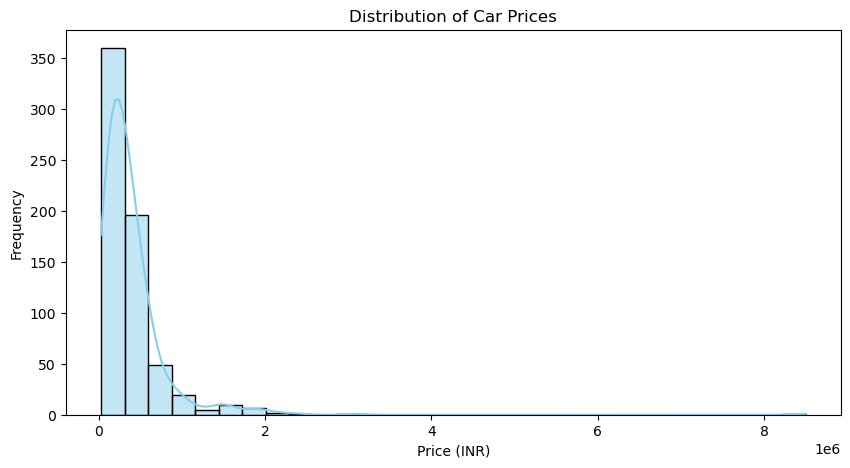

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'],bins=30,kde=True,color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

Interpretetion: The graph shows how car prices are sperad.A right-skew indicates most cars are in the lower price range.

# Cars by Manufacturing year

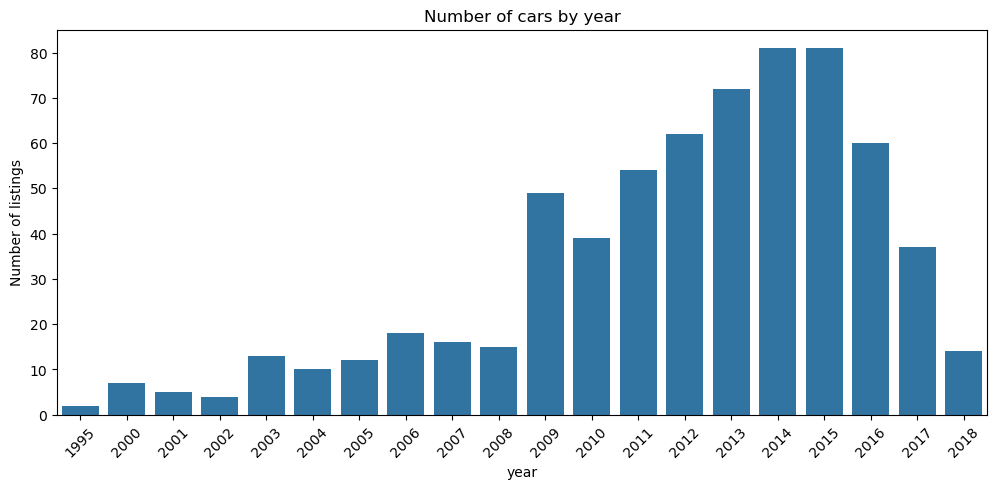

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='year',order=sorted(df['year'].unique()))
plt.xticks(rotation=45)
plt.title('Number of cars by year')
plt.xlabel('year')
plt.ylabel('Number of listings')
plt.show()

Interpretation:Most listed cars are from recent years.Older cars are fewer due to wear or less demand.

# KMs Driven vs. Price (Scatter Plot)

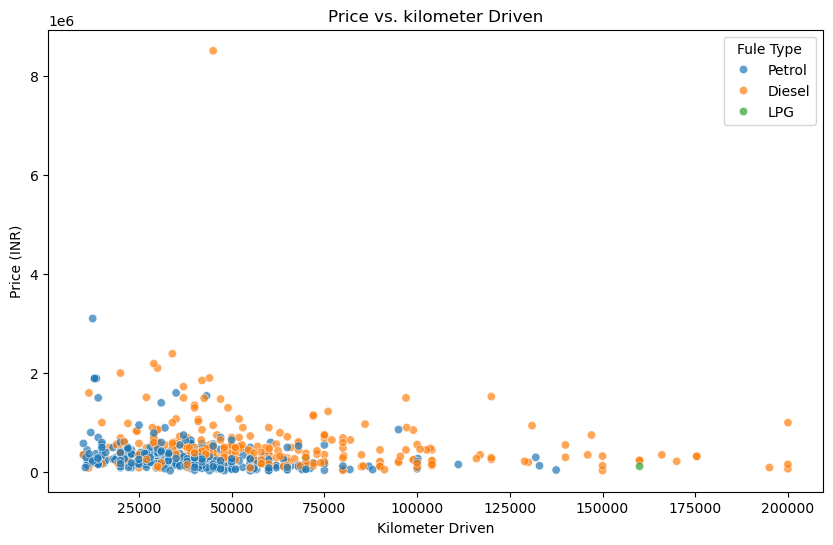

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='kms_driven',y='Price',hue='fuel_type',alpha=0.7)
plt.title('Price vs. kilometer Driven')
plt.xlabel('Kilometer Driven')
plt.ylabel('Price (INR)')
plt.legend(title='Fule Type')
plt.show()
         

Interpretation: Price generally drops as the kilometers increase. fuel type may also influence price trends.

# Top 10 Most Listed Car Brands 

C:\Users\nitin\AppData\Local\Temp\ipykernel_6500\4176847264.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index,y=top_brands.values,palette='viridis')


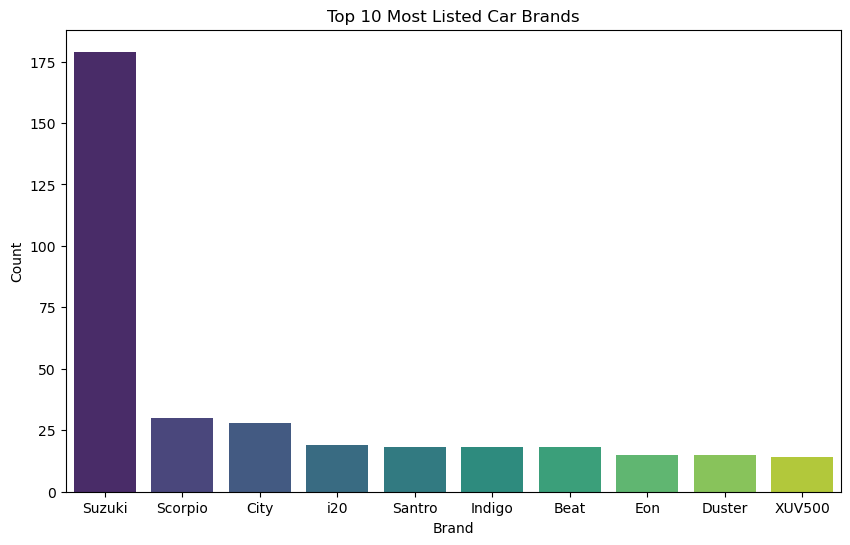

In [10]:
df['brand']=df['name'].str.split().str[0]  #Extract brand

top_brands=df['brand'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index,y=top_brands.values,palette='viridis')
plt.title("Top 10 Most Listed Car Brands")
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

Interpretation: These are the most common car brands sold on the platform.Helps understand market trends.Suzuki is the most demanding brand.

# Price Comparison of Top Brands (Boxplot)

C:\Users\nitin\AppData\Local\Temp\ipykernel_6500\3629627654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['brand'].isin(top5)],x='brand',y='Price',palette='pastel')


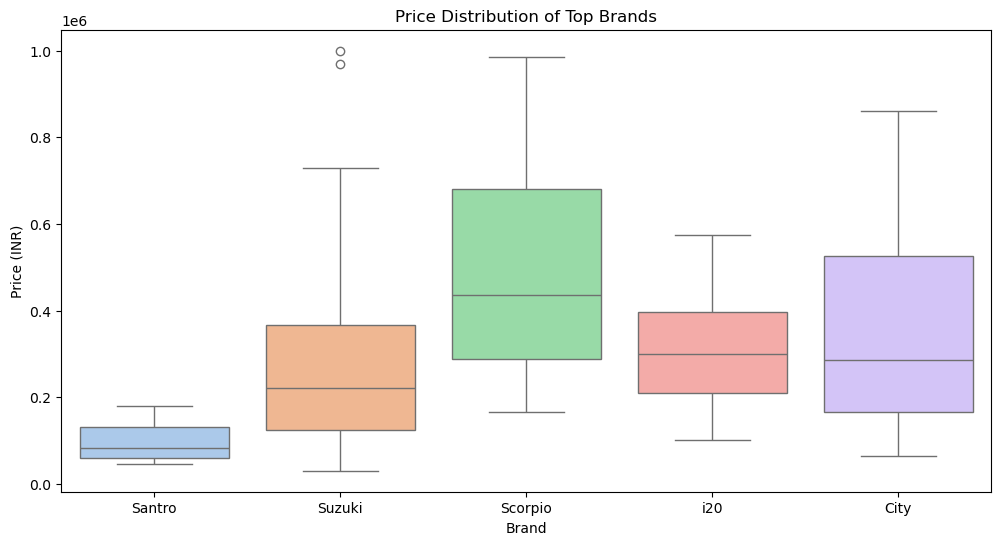

In [13]:
top5=df['brand'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['brand'].isin(top5)],x='brand',y='Price',palette='pastel')
plt.title('Price Distribution of Top Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.show()

Interpretation:
 
This shows the price range and outliers per brand. Some brands have higher price variability.
Santro targets the lower-budget segment.
City and Scorpio Brand attract premium buyyers, these brands may have more models/variants.

# Fuel Type Distribution

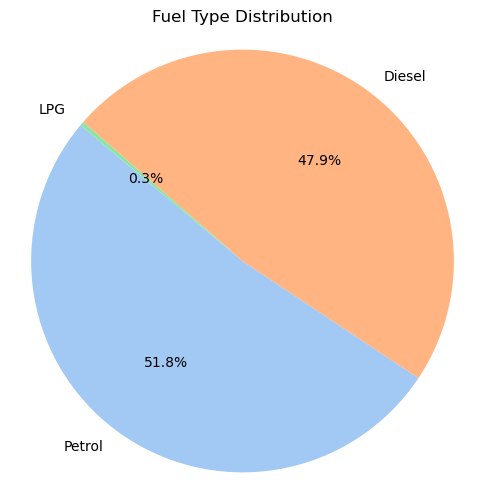

In [14]:
fuel_counts = df['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.axis('equal')  # Equal aspect ratio
plt.show()

Interpretation:
It Reveals fuel types Petrol is most common among listed cars.

# Average Price by Fuel Type

C:\Users\nitin\AppData\Local\Temp\ipykernel_6500\2166151948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='fuel_type', y='Price', estimator='mean', palette='Accent')


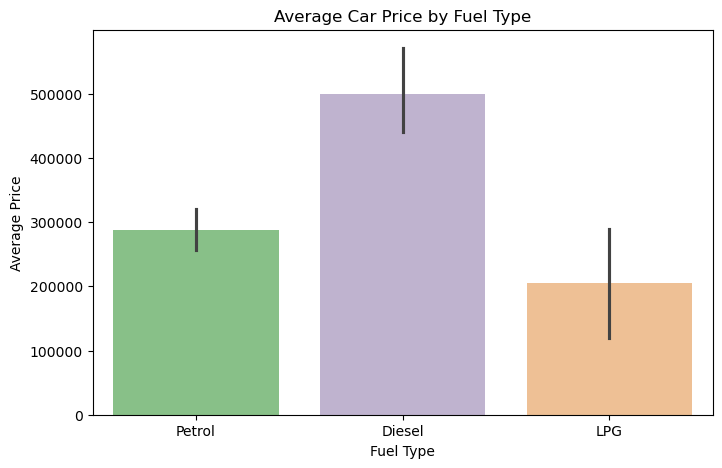

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='fuel_type', y='Price', estimator='mean', palette='Accent')
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

 Interpretation:
Reveals which fuel type tends to have higher average price. Diesel or hybrid cars may often be priced higher.

# Relationship Between Year and Price

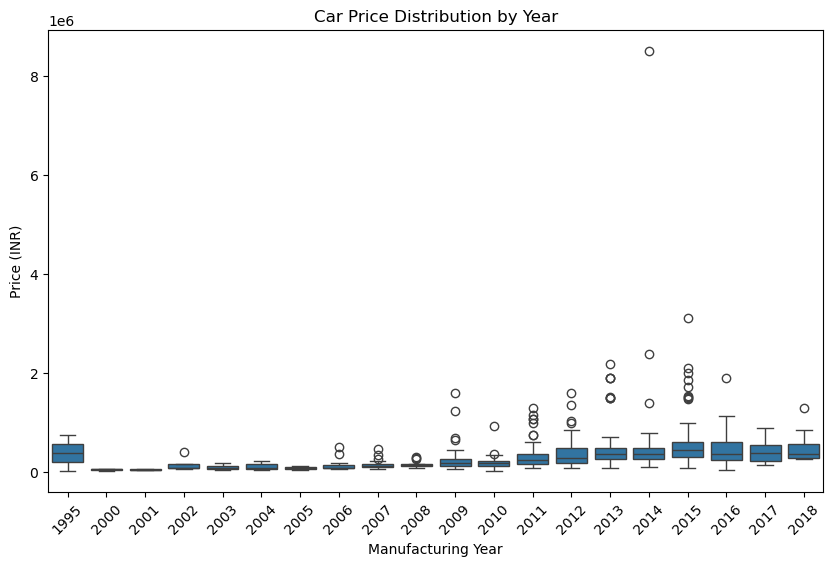

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='year', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (INR)')
plt.show()

 Interpretation:
Shows how price varies with car age. Usually, newer models have higher prices.

# Price Trend Over Years (Mean Price per Year)

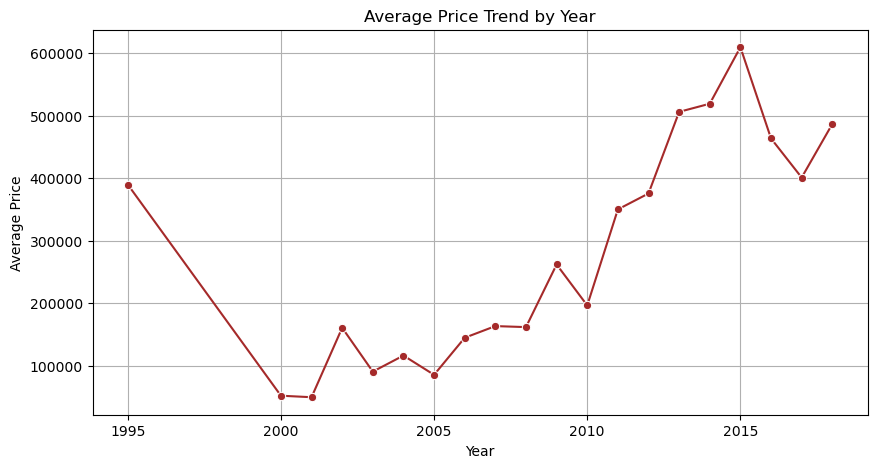

In [25]:
avg_price_by_year = df.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_by_year, x='year', y='Price', marker='o', color='brown')
plt.title('Average Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Interpretation:
Helps identify how car prices have changed over the years. Useful for trend analysis.

# Correlation Heatmap

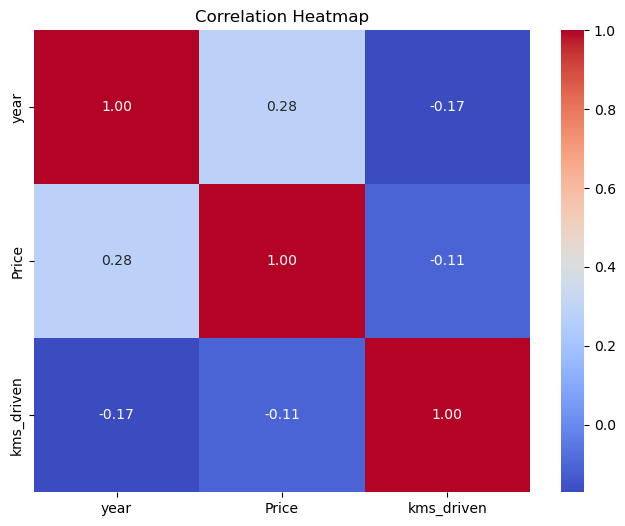

In [26]:
plt.figure(figsize=(8,6))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Interpretation:
Shows correlation between numeric variables like price, mileage, year, kms driven. Useful to identify predictive features.
As manufacturing increases, the price also increases.
The more a car is driven, the lower its resale value.